# House Price Prediction XGBoost Regression

**I have used kaggle competitive data!**

## File descriptions
   * train.csv - the training set
   * test.csv - the test set

## Data fields

**Here's a brief version of what you'll find in the data description file.**

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost
from xgboost import plot_importance
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error
from scipy.stats import skew
from collections import OrderedDict

In [2]:
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
train_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Study features

In [6]:
categorical_features=['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities',
                      'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
                      'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond',
                      'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
                      'HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu',
                     'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence',
                     'MiscFeature','SaleType','SaleCondition']

In [7]:
train_dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Preparing the dataset

### Normalizing

In [8]:
every_column_non_categorical= [col for col in train_dataset.columns if col not in categorical_features and col not in ['Id']] 

In [9]:
numeric_feats = train_dataset[every_column_non_categorical].dtypes[train_dataset.dtypes != 'object'].index

In [10]:
numeric_feats

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
train_dataset[numeric_feats] = np.log1p(train_dataset[numeric_feats])

In [12]:
train_dataset[numeric_feats]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,4.189655,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,6.561031,0.000000,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,2.197225,0.000000,7.602900,1.098612,6.308098,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,1.098612,7.605392,12.247699
1,4.394449,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,6.886532,0.000000,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,1.098612,0.000000,1.386294,0.693147,1.945910,0.693147,7.589336,1.098612,6.133398,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.791759,7.604894,12.109016
2,4.234107,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,6.188264,0.000000,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,1.945910,0.693147,7.601902,1.098612,6.411818,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,2.302585,7.605392,12.317171
3,4.110874,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,5.379897,0.000000,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,0.693147,0.000000,1.386294,0.693147,2.079442,0.693147,7.600402,1.386294,6.466145,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,1.098612,7.604396,11.849405
4,4.442651,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,6.486161,0.000000,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,1.098612,0.693147,1.609438,0.693147,2.302585,0.693147,7.601402,1.386294,6.729824,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000,2.564949,7.605392,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.143135,8.976894,1.945910,1.791759,7.600902,7.601402,0.000000,0.000000,0.000000,6.860664,6.860664,6.860664,6.543912,0.0,7.407318,0.000000,0.000000,1.098612,0.693147,1.386294,0.693147,2.079442,0.693147,7.600902,1.098612,6.133398,0.000000,3.713572,0.000000,0.0,0.0,0.0,0.000000,2.197225,7.604894,12.072547
1456,4.454347,9.486152,1.945910,1.945910,7.590347,7.595387,4.787492,6.673298,5.099866,6.380123,7.341484,7.637234,0.000000,0.0,7.637234,0.693147,0.000000,1.098612,0.000000,1.386294,0.693147,2.079442,1.098612,7.590347,1.098612,6.216606,5.857933,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.098612,7.606387,12.254868
1457,4.204693,9.109746,2.079442,2.302585,7.571474,7.604396,0.000000,5.620401,0.000000,6.777647,7.050123,7.080868,7.050123,0.0,7.758333,0.000000,0.000000,1.098612,0.000000,1.609438,0.693147,2.302585,1.098612,7.571474,0.693147,5.533389,0.000000,4.110874,0.000000,0.0,0.0,0.0,7.824446,1.791759,7.606387,12.493133
1458,4.234107,9.181735,1.791759,1.945910,7.576097,7.599401,0.000000,3.912023,6.937314,0.000000,6.983790,6.983790,0.000000,0.0,6.983790,0.693147,0.000000,0.693147,0.000000,1.098612,0.693147,1.791759,0.000000,7.576097,0.693147,5.484797,5.905362,0.000000,4.727388,0.0,0.0,0.0,0.000000,1.609438,7.606387,11.864469


## Same for test dataset

In [13]:
every_column_non_categorical_test= [col for col in test_dataset.columns if col not in categorical_features and col not in ['Id'] ]
numeric_feats_test = test_dataset[every_column_non_categorical_test].dtypes[test_dataset.dtypes != "object"].index
test_dataset[numeric_feats_test] = np.log1p(test_dataset[numeric_feats_test])

In [14]:
test_dataset[numeric_feats_test]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,4.394449,9.360741,1.791759,1.945910,7.581720,7.581720,0.000000,6.150603,4.976734,5.602119,6.783325,6.799056,0.000000,0.0,6.799056,0.000000,0.000000,0.693147,0.000000,1.098612,0.693147,1.791759,0.000000,7.581720,0.693147,6.594413,4.948760,0.000000,0.0,0.0,4.795791,0.0,0.000000,1.945910,7.606387
1,4.406719,9.565775,1.945910,1.945910,7.580189,7.580189,4.691348,6.828712,0.000000,6.008813,7.192934,7.192934,0.000000,0.0,7.192934,0.000000,0.000000,0.693147,0.693147,1.386294,0.693147,1.945910,0.000000,7.580189,0.693147,5.746203,5.976351,3.610918,0.0,0.0,0.000000,0.0,9.433564,1.945910,7.606387
2,4.317488,9.534668,1.791759,1.791759,7.599902,7.600402,0.000000,6.674561,0.000000,4.927254,6.834109,6.834109,6.553933,0.0,7.396335,0.000000,0.000000,1.098612,0.693147,1.386294,0.693147,1.945910,0.693147,7.599902,1.098612,6.180017,5.361292,3.555348,0.0,0.0,0.000000,0.0,0.000000,1.386294,7.606387
3,4.369448,9.208238,1.945910,1.945910,7.600402,7.600402,3.044522,6.401917,0.000000,5.783825,6.831954,6.831954,6.520621,0.0,7.380879,0.000000,0.000000,1.098612,0.693147,1.386294,0.693147,2.079442,0.693147,7.600402,1.098612,6.154858,5.888878,3.610918,0.0,0.0,0.000000,0.0,0.000000,1.945910,7.606387
4,3.784190,8.518392,2.197225,1.791759,7.597396,7.597396,0.000000,5.575949,0.000000,6.925595,7.155396,7.155396,0.000000,0.0,7.155396,0.000000,0.000000,1.098612,0.000000,1.098612,0.693147,1.791759,0.000000,7.597396,1.098612,6.228511,0.000000,4.418841,0.0,0.0,4.976734,0.0,0.000000,0.693147,7.606387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3.091042,7.568896,1.609438,2.079442,7.586296,7.586296,0.000000,0.000000,0.000000,6.304449,6.304449,6.304449,6.304449,0.0,6.996681,0.000000,0.000000,0.693147,0.693147,1.386294,0.693147,1.791759,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.945910,7.604396
1455,3.091042,7.546974,1.609438,1.791759,7.586296,7.586296,0.000000,5.533389,0.000000,5.686975,6.304449,6.304449,6.304449,0.0,6.996681,0.000000,0.000000,0.693147,0.693147,1.386294,0.693147,1.945910,0.000000,7.586296,0.693147,5.659482,0.000000,3.218876,0.0,0.0,0.000000,0.0,0.000000,1.609438,7.604396
1456,5.081404,9.903538,1.791759,2.079442,7.581210,7.599401,0.000000,7.110696,0.000000,0.000000,7.110696,7.110696,0.000000,0.0,7.110696,0.693147,0.000000,0.693147,0.000000,1.609438,0.693147,2.079442,0.693147,7.581210,1.098612,6.357842,6.163315,0.000000,0.0,0.0,0.000000,0.0,0.000000,2.302585,7.604396
1457,4.143135,9.253591,1.791759,1.791759,7.597396,7.597396,0.000000,5.823046,0.000000,6.356108,6.816736,6.878326,0.000000,0.0,6.878326,0.000000,0.693147,0.693147,0.000000,1.386294,0.693147,1.945910,0.000000,NaN,0.000000,0.000000,4.394449,3.496508,0.0,0.0,0.000000,0.0,6.552508,2.079442,7.604396


### Cleaning

In [15]:
features_with_nan=['Alley','MasVnrType','BsmtQual','BsmtQual','BsmtCond','BsmtCond','BsmtExposure',
                   'BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish']

In [16]:
def ConverNaNToNAString(data, columnList):
    for x in columnList:       
        data[x] =str(data[x])

In [17]:
ConverNaNToNAString(train_dataset, features_with_nan)

In [18]:
ConverNaNToNAString(test_dataset, features_with_nan)

### Creating columns from each categorical feature value

In [19]:
train_dataset = pd.get_dummies(train_dataset,columns =categorical_features)
test_dataset = pd.get_dummies(test_dataset,columns =categorical_features)

### Looking for most relevant features

In [20]:
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

In [21]:
every_column_except_y= [col for col in train_dataset.columns if col not in ['SalePrice','Id']]

In [22]:
model.fit(train_dataset[every_column_except_y],train_dataset['SalePrice'])

[16:42:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.4, learning_rate=0.07, min_child_weight=1.5,
             n_estimators=10000, reg_alpha=0.75, reg_lambda=0.45, seed=42,
             subsample=0.6)

In [23]:
OrderedDict(sorted(model.get_booster().get_fscore().items(), key=lambda t:t[1], reverse=True))

OrderedDict([('LotArea', 2487),
             ('LotFrontage', 2372),
             ('BsmtUnfSF', 2295),
             ('GrLivArea', 2214),
             ('GarageYrBlt', 2072),
             ('TotalBsmtSF', 1805),
             ('1stFlrSF', 1767),
             ('GarageArea', 1727),
             ('BsmtFinSF1', 1525),
             ('WoodDeckSF', 1468),
             ('OpenPorchSF', 1414),
             ('YearBuilt', 1317),
             ('MasVnrArea', 1260),
             ('MoSold', 1220),
             ('2ndFlrSF', 1091),
             ('YearRemodAdd', 1036),
             ('YrSold', 682),
             ('OverallCond', 630),
             ('OverallQual', 553),
             ('EnclosedPorch', 536),
             ('TotRmsAbvGrd', 525),
             ('BsmtFinSF2', 460),
             ('BedroomAbvGr', 436),
             ('ScreenPorch', 373),
             ('Fireplaces', 306),
             ('Neighborhood_NAmes', 281),
             ('SaleCondition_Normal', 232),
             ('BsmtFullBath', 225),
             (

In [24]:
most_relevant_features= list( dict((k, v) for k, v in model.get_booster().get_fscore().items() if v >= 10).keys())
print(most_relevant_features)

['GrLivArea', 'OverallQual', 'ExterQual_TA', 'GarageCars', 'FullBath', 'TotalBsmtSF', 'YearBuilt', 'Fireplaces', 'GarageCond_TA', 'CentralAir_Y', 'YearRemodAdd', '1stFlrSF', 'MSSubClass_30', 'MSZoning_C (all)', 'CentralAir_N', 'MSZoning_RM', 'OverallCond', 'LotArea', 'GarageArea', 'GarageYrBlt', 'KitchenAbvGr', 'BsmtFinSF1', 'BedroomAbvGr', 'MSSubClass_90', 'RoofStyle_Gable', 'Functional_Min2', 'LotFrontage', 'HouseStyle_1.5Fin', 'Fence_GdWo', 'BsmtUnfSF', 'KitchenQual_Ex', 'EnclosedPorch', 'Exterior1st_AsbShng', 'BsmtFullBath', 'KitchenQual_TA', 'Neighborhood_IDOTRR', 'HeatingQC_Fa', 'PavedDrive_N', 'BsmtFinSF2', 'OpenPorchSF', 'SaleCondition_Normal', 'ExterCond_Fa', 'SaleCondition_Abnorml', 'Condition2_Norm', 'Neighborhood_Edwards', 'HeatingQC_Ex', 'Neighborhood_Sawyer', 'MSZoning_RL', 'Exterior2nd_Stucco', 'Exterior1st_MetalSd', 'Condition1_PosN', 'WoodDeckSF', 'Functional_Typ', 'Exterior1st_Stucco', 'PoolArea', 'Neighborhood_CollgCr', 'Condition1_Artery', 'SaleType_COD', 'TotRmsAbv

### Analyzing and Visualizing most important features

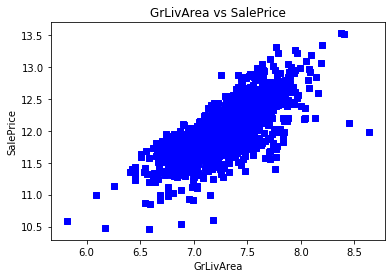

In [25]:
plt.scatter(train_dataset.GrLivArea, train_dataset.SalePrice, c = "blue", marker = "s")
plt.title("GrLivArea vs SalePrice")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

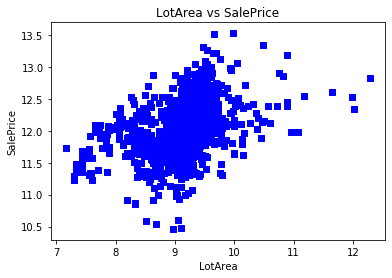

In [26]:
plt.scatter(train_dataset.LotArea, train_dataset.SalePrice, c = "blue", marker = "s")
plt.title("LotArea vs SalePrice")
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.show()

In [27]:
train_dataset = train_dataset[train_dataset.GrLivArea < 8.25]
train_dataset = train_dataset[train_dataset.LotArea < 11.5]
train_dataset = train_dataset[train_dataset.SalePrice<13]
train_dataset = train_dataset[train_dataset.SalePrice>10.75]
train_dataset.drop("Id", axis=1, inplace=True)

In [28]:
train_x=train_dataset[most_relevant_features]
train_y=train_dataset['SalePrice']

# Let's predict for test data and generate submission file

In [29]:
best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

In [30]:
best_xgb_model.fit(train_x,train_y)

[16:43:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.4, learning_rate=0.07, min_child_weight=1.5,
             n_estimators=10000, reg_alpha=0.75, reg_lambda=0.45, seed=42,
             subsample=0.6)

In [49]:
test_dataset['Prediction'] = best_xgb_model.predict(test_dataset[most_relevant_features])
filename = 'Output.csv'
pd.DataFrame({'Id': test_dataset.Id, 'SalePrice': test_dataset.Prediction}).to_csv(filename, index=False)

In [50]:
print(test_dataset['Prediction'].head())
print(test_dataset['Prediction'].count())

0    11.740943
1    11.983206
2    12.145020
3    12.159039
4    12.123687
Name: Prediction, dtype: float32
1459


In [51]:
train_dataset['Prediction'] = best_xgb_model.predict(train_dataset[most_relevant_features])

In [52]:
train_dataset[['Prediction','SalePrice']]

,Prediction,SalePrice
0,12.248098,12.247699
1,12.104185,12.109016
2,12.299576,12.317171
3,11.858686,11.849405
4,12.488692,12.429220
...,...,...
1455,12.088084,12.072547
1456,12.216693,12.254868
1457,12.472442,12.493133
1458,11.863468,11.864469


In [53]:
ypred = best_xgb_model.predict(train_x)

In [54]:
print(mean_absolute_error(train_y,ypred))

0.019832789266117434


In [55]:
from sklearn.metrics import r2_score

In [56]:
print(r2_score(train_y,ypred))

0.9943434341641236


# The End!